In [1]:
    import pandas as pd
    import numpy as np
    
    df = pd.read_csv("netflix_reviews.csv")  # 파일 불러오기
    df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,166731e8-4b10-4968-838d-329473357328,Sylviah Chichi,Great App on the move ..... I can watch my mov...,5,0,8.136.0 build 3 50908,2024-10-21 14:15:31,8.136.0 build 3 50908
1,68bab7d0-2afc-4454-970f-159ced93d751,Marilyn Goeda,good,5,0,NaN,2024-10-21 14:08:15,NaN
2,6c2d3e85-b5ca-4228-93bd-abd2236eab51,Nikhil Pk,Need to improve and to update some error durin...,3,0,8.131.0 build 3 50829,2024-10-21 13:54:11,8.131.0 build 3 50829
3,d62b0303-4c87-4c96-9c2c-a3ca6e0b056d,Mmesoma Eberechukwu,"Netflix is a nice app,but not all the movies a...",3,0,8.136.0 build 3 50908,2024-10-21 13:30:42,8.136.0 build 3 50908
4,d6014252-863e-4e06-b440-25e0ece47a31,Keabetswe Monaise,Not much availability considering options on w...,3,0,8.136.0 build 3 50908,2024-10-21 13:28:43,8.136.0 build 3 50908
...,...,...,...,...,...,...,...,...
117129,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117130,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117131,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117132,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


In [2]:
print(df.shape) 
print(df.columns)

(117134, 8)
Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [3]:
df['score'].dtype

dtype('int64')

In [4]:
df = df.iloc[:,0:5]
df.head()

,reviewId,userName,content,score,thumbsUpCount
0,166731e8-4b10-4968-838d-329473357328,Sylviah Chichi,Great App on the move ..... I can watch my mov...,5,0
1,68bab7d0-2afc-4454-970f-159ced93d751,Marilyn Goeda,good,5,0
2,6c2d3e85-b5ca-4228-93bd-abd2236eab51,Nikhil Pk,Need to improve and to update some error durin...,3,0
3,d62b0303-4c87-4c96-9c2c-a3ca6e0b056d,Mmesoma Eberechukwu,"Netflix is a nice app,but not all the movies a...",3,0
4,d6014252-863e-4e06-b440-25e0ece47a31,Keabetswe Monaise,Not much availability considering options on w...,3,0


In [5]:
df.tail()

,reviewId,userName,content,score,thumbsUpCount
117129,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0
117130,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0
117131,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0
117132,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0
117133,dc1352e9-10a8-41ca-ab23-05d045b08e90,suraj soni,"this app is awesome for english movies ,series...",4,0


데이터 전처리

In [6]:
# 전처리 함수
import re
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

In [7]:
df['reviewId'] = df['reviewId'].apply(preprocess_text)
df['userName'] = df['userName'].apply(preprocess_text)
df['content'] = df['content'].apply(preprocess_text)
print(df)

               reviewId             userName  \
0                   ebd       sylviah chichi   
1          babdafcfcedd        marilyn goeda   
2        cdebcabdabdeab            nikhil pk   
3          dbccccacaebd  mmesoma eberechukwu   
4             deebeecea    keabetswe monaise   
...                 ...                  ...   
117129  aeadeaaedaccdac        a google user   
117130     fedfacebcacf         captain jeoy   
117131   acfabfbcedebac             suryansh   
117132           ffcbca        a google user   
117133      dceacaabdbe           suraj soni   

                                                  content  score  \
0       great app on the move  i can watch my movies a...      5   
1                                                    good      5   
2       need to improve and to update some error durin...      3   
3       netflix is a nice appbut not all the movies ar...      3   
4       not much availability considering options on w...      3   
...            

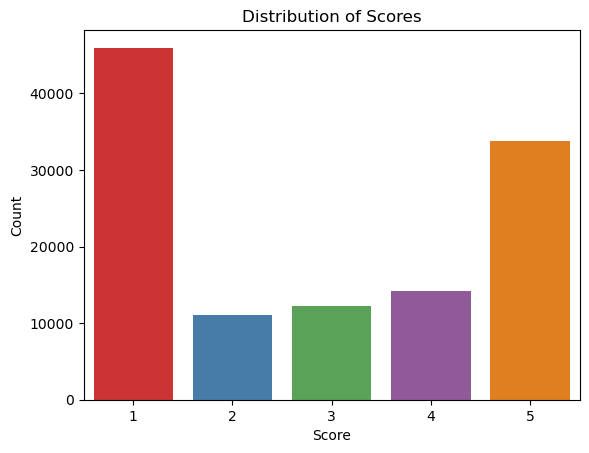

In [8]:
import seaborn as sns  # 그래프를 그리기 위한 seaborn 라이브러리 임포트 (없으면 설치 바랍니다)
import matplotlib.pyplot as plt  # 그래프 표시를 위한 pyplot 임포트

score_counts = df['score'].value_counts().reset_index() # score 컬럼의 값에 대한 빈도수를 계산한 후 시각화
score_counts.columns = ['score','score_count']
# score_counts

sns.barplot(x='score', y='score_count', data=score_counts, palette='Set1', hue = 'score', legend=False)
# # sns.countplot(x=df['score']) : countplot 이용한 방법 , 간단하게 표현가능
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

In [9]:

import torch
print(torch.__version__)  
print(torch.version.cuda)  
print(torch.cuda.is_available()) 



2.4.1
12.4
True


In [10]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [11]:

reviews = df['content'].tolist()  # 'content'를 리스트로 변환
ratings = df['score'].tolist()    # 'score'를 리스트로 변환

# 데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, text_pipeline, label_pipeline):
        self.reviews = reviews
        self.ratings = ratings
        self.text_pipeline = text_pipeline
        self.label_pipeline = label_pipeline

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = self.text_pipeline(self.reviews[idx])
        rating = self.label_pipeline(self.ratings[idx])
        return torch.tensor(review), torch.tensor(rating)

# 토크나이저 정의 (기본 영어 토크나이저)
tokenizer = get_tokenizer('basic_english')

# 어휘 사전 생성 함수
def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

# 어휘 사전 생성
vocab = build_vocab_from_iterator(yield_tokens(reviews))

# 텍스트 파이프라인 정의 (어휘 사전에 있는 단어만 처리)
def text_pipeline(text):
    return [vocab[token] for token in tokenizer(text) if token in vocab]

# 이미 score가 숫자형이라 label_pipeline 생략 가능
def label_pipeline(label):
    return label  # 평점이 이미 숫자형이라 변환 생략 




   
train_reviews, test_reviews, train_ratings, test_ratings = train_test_split(reviews, ratings, test_size=0.2, random_state=42)


# 데이터셋 정의
train_dataset = ReviewDataset(train_reviews, train_ratings, text_pipeline, label_pipeline)
test_dataset = ReviewDataset(test_reviews, test_ratings, text_pipeline, label_pipeline)

# 데이터 로더 정의

BATCH_SIZE = 64

from torch.nn.utils.rnn import pad_sequence

def collate_fn(batch):
    reviews, ratings = zip(*batch)
    reviews = pad_sequence([torch.tensor(r) for r in reviews], batch_first=True)
    ratings = torch.tensor(ratings)
    return reviews, ratings

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)



117134lines [00:01, 82778.76lines/s] 


In [12]:
print(type(reviews))

<class 'list'>


In [13]:
# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.lstm(embedded)
        return self.fc(hidden[-1])

# 하이퍼파라미터 정의
VOCAB_SIZE = len(vocab)
EMBED_DIM = 16
HIDDEN_DIM = 32
OUTPUT_DIM = len(set(ratings))  # 예측할 점수 개수

# 모델 초기화
model = LSTMModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 모델을 CUDA로 이동 (가능한 경우)
device = torch.device("cuda")
model.to(device)

# 모델 학습 함수 정의
def train_model(model, train_dataloader, criterion, optimizer, num_epochs=10):
    model.train()  # 학습 모드로 설정
    for epoch in range(num_epochs):
        total_loss = 0  # 에포크마다 손실을 추적
        for i, (reviews, ratings) in enumerate(train_dataloader):
            reviews, ratings = reviews.to(device), ratings.to(device)  # 데이터를 GPU로 이동
            
            optimizer.zero_grad()
            outputs = model(reviews)  # 모델에 입력하여 예측값 계산
            loss = criterion(outputs, ratings)  # 손실 계산
            loss.backward()  # 역전파
            optimizer.step()  # 가중치 업데이트

            total_loss += loss.item()

            # 배치마다 손실 출력
            if (i + 1) % 10 == 0:
                print(f'Epoch {epoch+1}/{num_epochs}, Batch {i+1}/{len(train_dataloader)}, Loss: {loss.item():.4f}')
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {total_loss/len(train_dataloader):.4f}')
    
    print("Finished Training")


# 모델 학습 실행
train_model(model, train_dataloader, criterion, optimizer, num_epochs=10)

KeyboardInterrupt: 

In [14]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.nn.utils.rnn import pad_sequence
import numpy as np


reviews = df['content'].tolist()  # 'content'를 리스트로 변환
ratings = df['score'].tolist()    # 'score'를 리스트로 변환



# 라벨을 정수형으로 변환 (필수적인 과정)
label_encoder = LabelEncoder()
ratings = label_encoder.fit_transform(ratings)  # 평점 정수형으로 변환

# 데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, text_pipeline, label_pipeline):
        self.reviews = reviews
        self.ratings = ratings
        self.text_pipeline = text_pipeline
        self.label_pipeline = label_pipeline

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = self.text_pipeline(self.reviews[idx])
        rating = self.label_pipeline(self.ratings[idx])
        return torch.tensor(review), torch.tensor(rating)

# 토크나이저 정의 (기본 영어 토크나이저)
tokenizer = get_tokenizer('basic_english')

# 어휘 사전 생성 함수
def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

# 어휘 사전 생성
vocab = build_vocab_from_iterator(yield_tokens(reviews))


# 텍스트 파이프라인 정의 (어휘 사전에 있는 단어만 처리)
def text_pipeline(text):
    return [vocab[token] for token in tokenizer(text)]

# 평점 그대로 사용
def label_pipeline(label):
    return label  # 이미 숫자형이므로 변환 생략

# 데이터를 학습용(train)과 테스트용(test)으로 분리
train_reviews, test_reviews, train_ratings, test_ratings = train_test_split(reviews, ratings, test_size=0.2, random_state=42)

# 데이터셋 정의
train_dataset = ReviewDataset(train_reviews, train_ratings, text_pipeline, label_pipeline)
test_dataset = ReviewDataset(test_reviews, test_ratings, text_pipeline, label_pipeline)

# 패딩을 적용하는 함수 정의

def collate_fn(batch):
    reviews, ratings = zip(*batch)
    reviews = pad_sequence([torch.tensor(r, dtype=torch.long) for r in reviews], batch_first=True)  # 정수형 텐서로 변환
    ratings = torch.tensor(ratings, dtype=torch.long)  # 평점도 정수형으로 변환
    return reviews, ratings
# 데이터 로더 정의
BATCH_SIZE = 64

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)  # Embedding으로 변경
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.lstm(embedded)
        return self.fc(hidden[-1])

# 하이퍼파라미터 정의
VOCAB_SIZE = len(vocab)
EMBED_DIM = 64
HIDDEN_DIM = 128
OUTPUT_DIM = len(set(ratings))  # 예측할 점수 개수 (평점이 정수형)

# 모델 초기화
model = LSTMModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)  # SGD 에서 Adam으로 변경

# 모델을 CUDA로 이동 (가능한 경우)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 모델 학습 함수 정의
def train_model(model, train_dataloader, criterion, optimizer, num_epochs=10):
    model.train()  # 학습 모드로 설정
    for epoch in range(num_epochs):
        total_loss = 0  # 에포크마다 손실을 추적
        for i, (reviews, ratings) in enumerate(train_dataloader):
            reviews, ratings = reviews.to(device), ratings.to(device)  # 데이터를 GPU로 이동
            
            optimizer.zero_grad()
            outputs = model(reviews)  # 모델에 입력하여 예측값 계산
            loss = criterion(outputs, ratings)  # 손실 계산
            loss.backward()  # 역전파
            optimizer.step()  # 가중치 업데이트

            total_loss += loss.item()

            # 배치마다 손실 출력
            if (i + 1) % 10 == 0:
                print(f'Epoch {epoch+1}/{num_epochs}, Batch {i+1}/{len(train_dataloader)}, Loss: {loss.item():.4f}')
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {total_loss/len(train_dataloader):.4f}')
    
    print("Finished Training")

# 모델 학습 실행
train_model(model, train_dataloader, criterion, optimizer, num_epochs=10)


117134lines [00:01, 81889.02lines/s] 
C:\Users\1\AppData\Local\Temp\ipykernel_17888\2771336819.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reviews = pad_sequence([torch.tensor(r, dtype=torch.long) for r in reviews], batch_first=True)  # 정수형 텐서로 변환


Epoch 1/10, Batch 10/1465, Loss: 1.3810
Epoch 1/10, Batch 20/1465, Loss: 1.4653
Epoch 1/10, Batch 30/1465, Loss: 1.4734
Epoch 1/10, Batch 40/1465, Loss: 1.5264
Epoch 1/10, Batch 50/1465, Loss: 1.3799
Epoch 1/10, Batch 60/1465, Loss: 1.4198
Epoch 1/10, Batch 70/1465, Loss: 1.3761
Epoch 1/10, Batch 80/1465, Loss: 1.3432
Epoch 1/10, Batch 90/1465, Loss: 1.3956
Epoch 1/10, Batch 100/1465, Loss: 1.5167
Epoch 1/10, Batch 110/1465, Loss: 1.4003
Epoch 1/10, Batch 120/1465, Loss: 1.3788
Epoch 1/10, Batch 130/1465, Loss: 1.5288
Epoch 1/10, Batch 140/1465, Loss: 1.4892
Epoch 1/10, Batch 150/1465, Loss: 1.4253
Epoch 1/10, Batch 160/1465, Loss: 1.3844
Epoch 1/10, Batch 170/1465, Loss: 1.3808
Epoch 1/10, Batch 180/1465, Loss: 1.3811
Epoch 1/10, Batch 190/1465, Loss: 1.4670
Epoch 1/10, Batch 200/1465, Loss: 1.3674
Epoch 1/10, Batch 210/1465, Loss: 1.5136
Epoch 1/10, Batch 220/1465, Loss: 1.3654
Epoch 1/10, Batch 230/1465, Loss: 1.4793
Epoch 1/10, Batch 240/1465, Loss: 1.3452
Epoch 1/10, Batch 250/146

In [15]:
correct = 0
total = 0
with torch.no_grad():  # 평가 시에는 기울기 계산을 하지 않음
    for reviews, ratings in test_dataloader:
        reviews, ratings = reviews.to(device), ratings.to(device)
        outputs = model(reviews)
        _, predicted = torch.max(outputs, 1)
        total += ratings.size(0)
        correct += (predicted == ratings).sum().item()

print(f'Accuracy: {100 * correct / total}%')


C:\Users\1\AppData\Local\Temp\ipykernel_17888\2771336819.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  reviews = pad_sequence([torch.tensor(r, dtype=torch.long) for r in reviews], batch_first=True)  # 정수형 텐서로 변환


Accuracy: 62.35113330772186%


In [ ]:
print(next(model.parameters()).device)  # 모델 파라미터가 GPU에 있는지 확인
